In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("dataset_comunidades_senasoft.csv")
df.head()

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Jorge,23.0,Otro,Manizales,las calles están muy oscuras y peligrosas.,Salud,Urgente,2023-08-11,0,1,0
1,2,Camilo,40.0,Otro,Santa Marta,no tenemos centros culturales ni bibliotecas.,Medio Ambiente,No urgente,2023-04-12,1,1,1
2,3,Pedro,35.0,Otro,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Ana,NaN,F,Bogotá,la contaminación del río está aumentando.,Seguridad,No urgente,2023-06-04,0,1,1
4,5,Jorge,62.0,M,Manizales,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-07-10,1,0,1


In [3]:
df.columns


Index(['ID', 'Nombre', 'Edad', 'Género', 'Ciudad', 'Comentario',
       'Categoría del problema', 'Nivel de urgencia', 'Fecha del reporte',
       'Acceso a internet', 'Atención previa del gobierno', 'Zona rural'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10000 non-null  int64  
 1   Nombre                        10000 non-null  object 
 2   Edad                          9325 non-null   float64
 3   Género                        9539 non-null   object 
 4   Ciudad                        9864 non-null   object 
 5   Comentario                    9362 non-null   object 
 6   Categoría del problema        10000 non-null  object 
 7   Nivel de urgencia             10000 non-null  object 
 8   Fecha del reporte             10000 non-null  object 
 9   Acceso a internet             10000 non-null  int64  
 10  Atención previa del gobierno  10000 non-null  int64  
 11  Zona rural                    10000 non-null  int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 937.6+ KB


In [5]:
df.describe()

,ID,Edad,Acceso a internet,Atención previa del gobierno,Zona rural
count,10000.00000,9325.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,47.482895,0.510200,0.494800,0.492800
std,2886.89568,19.142348,0.499921,0.499998,0.499973
min,1.00000,15.000000,0.000000,0.000000,0.000000
25%,2500.75000,31.000000,0.000000,0.000000,0.000000
50%,5000.50000,48.000000,1.000000,0.000000,0.000000
75%,7500.25000,64.000000,1.000000,1.000000,1.000000
max,10000.00000,80.000000,1.000000,1.000000,1.000000


In [6]:
df["Categoría del problema"].unique()

array(['Salud', 'Medio Ambiente', 'Seguridad', 'Educación'], dtype=object)

In [7]:
df["Ciudad"].unique()

array(['Manizales', 'Santa Marta', 'Medellín', 'Bogotá', 'Cartagena',
       'Cali', 'Barranquilla', 'Pereira', 'Cúcuta', 'Bucaramanga', nan],
      dtype=object)

In [8]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.', nan,
       'queremos más presencia policial.'], dtype=object)

In [9]:
# df = df.dropna(subset=['Ciudad'])
df.isnull().sum()

ID                                0
Nombre                            0
Edad                            675
Género                          461
Ciudad                          136
Comentario                      638
Categoría del problema            0
Nivel de urgencia                 0
Fecha del reporte                 0
Acceso a internet                 0
Atención previa del gobierno      0
Zona rural                        0
dtype: int64

In [10]:
df.sample(5)

,ID,Nombre,Edad,Género,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
9134,9135,Valentina,69.0,M,Santa Marta,no hay suficientes escuelas públicas.,Salud,No urgente,2024-07-03,1,0,0
3898,3899,Camilo,NaN,F,Cali,hay problemas con la recolección de basura.,Educación,No urgente,2023-12-02,0,1,0
1777,1778,Ana,51.0,Otro,Cali,las calles están muy oscuras y peligrosas.,Educación,Urgente,2023-05-03,0,0,1
926,927,Juan,40.0,M,Cartagena,no hay suficientes escuelas públicas.,Seguridad,Urgente,2024-10-10,0,1,1
9374,9375,Carlos,76.0,Otro,Medellín,las basuras no se recogen a tiempo.,Educación,No urgente,2023-05-16,1,1,0


In [11]:
# Diccionario inverso: comentario → categoría correcta
categoria_por_comentario = {
    "faltan médicos en el centro de salud.": "Salud",
    "falta agua potable en varias casas.": "Salud",
    "no hay suficientes escuelas públicas.": "Educación",
    "no tenemos centros culturales ni bibliotecas.": "Educación",
    "necesitamos más acceso a internet en la zona.": "Educación",
    "las calles están muy oscuras y peligrosas.": "Seguridad",
    "queremos más presencia policial.": "Seguridad",
    "las basuras no se recogen a tiempo.": "Medio Ambiente",
    "la contaminación del río está aumentando.": "Medio Ambiente",
    "hay problemas con la recolección de basura.": "Medio Ambiente"
}

# Función de reasignación de categoría según comentario
def asignar_categoria(comentario):
    return categoria_por_comentario.get(comentario, np.nan)

# Aplicar la reasignación con .loc
df.loc[:, "Categoría del problema"] = df["Comentario"].apply(asignar_categoria)

# Convertir a string nativo (por claridad)
df.loc[:, "Categoría del problema"] = df["Categoría del problema"].astype("string")


In [12]:
df = df.dropna(subset=["Categoría del problema"])

In [13]:
df["Comentario"].unique()

array(['las calles están muy oscuras y peligrosas.',
       'no tenemos centros culturales ni bibliotecas.',
       'las basuras no se recogen a tiempo.',
       'la contaminación del río está aumentando.',
       'no hay suficientes escuelas públicas.',
       'hay problemas con la recolección de basura.',
       'necesitamos más acceso a internet en la zona.',
       'faltan médicos en el centro de salud.',
       'falta agua potable en varias casas.',
       'queremos más presencia policial.'], dtype=object)

In [14]:
df = df.drop(columns=['Edad', 'Nombre','Género'], errors='ignore')
df['Fecha del reporte'] = pd.to_datetime(df['Fecha del reporte'], errors='coerce')
df.head()

,ID,Ciudad,Comentario,Categoría del problema,Nivel de urgencia,Fecha del reporte,Acceso a internet,Atención previa del gobierno,Zona rural
0,1,Manizales,las calles están muy oscuras y peligrosas.,Seguridad,Urgente,2023-08-11,0,1,0
1,2,Santa Marta,no tenemos centros culturales ni bibliotecas.,Educación,No urgente,2023-04-12,1,1,1
2,3,Medellín,las basuras no se recogen a tiempo.,Medio Ambiente,No urgente,2023-06-09,1,1,0
3,4,Bogotá,la contaminación del río está aumentando.,Medio Ambiente,No urgente,2023-06-04,0,1,1
4,5,Manizales,no hay suficientes escuelas públicas.,Educación,Urgente,2024-07-10,1,0,1


In [15]:
def extraer_por_columna(df, columna):
    """Devuelve las filas donde la columna indicada tiene valor 1."""
    return df[df[columna] == 'Urgente']


In [16]:
acce_df = extraer_por_columna(df, "Nivel de urgencia")
print(acce_df)


         ID     Ciudad                                     Comentario  \
0         1  Manizales     las calles están muy oscuras y peligrosas.   
4         5  Manizales          no hay suficientes escuelas públicas.   
7         8     Bogotá          no hay suficientes escuelas públicas.   
10       11     Bogotá            falta agua potable en varias casas.   
11       12  Manizales      la contaminación del río está aumentando.   
...     ...        ...                                            ...   
9986   9987     Cúcuta     las calles están muy oscuras y peligrosas.   
9991   9992    Pereira    hay problemas con la recolección de basura.   
9994   9995  Manizales          faltan médicos en el centro de salud.   
9996   9997     Cúcuta    hay problemas con la recolección de basura.   
9999  10000    Pereira  necesitamos más acceso a internet en la zona.   

     Categoría del problema Nivel de urgencia Fecha del reporte  \
0                 Seguridad           Urgente        202

In [17]:
df = df.dropna(subset=["Categoría del problema"])

In [18]:
df_u = df[["Comentario", "Categoría del problema"]]
df_u.head()

,Comentario,Categoría del problema
0,las calles están muy oscuras y peligrosas.,Seguridad
1,no tenemos centros culturales ni bibliotecas.,Educación
2,las basuras no se recogen a tiempo.,Medio Ambiente
3,la contaminación del río está aumentando.,Medio Ambiente
4,no hay suficientes escuelas públicas.,Educación


In [19]:
# import re

# def limpiar_texto(texto):
#     texto = texto.lower()
#     texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
#     return texto

# df_u["Comentario_limpio"] = df_u["Comentario"].apply(limpiar_texto)

In [20]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer

# X_train, X_test, y_train, y_test = train_test_split(
#     df_u["Comentario_limpio"], 
#     df_u["Categoría del problema"], 
#     test_size=0.2, 
#     random_state=42
# )

# vectorizador = TfidfVectorizer(max_features=1000)
# X_train_vec = vectorizador.fit_transform(X_train)
# X_test_vec = vectorizador.transform(X_test)


In [21]:
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer

# X_train, X_test, y_train, y_test = train_test_split(
#     df_u["Comentario_limpio"], 
#     df_u["Categoría del problema"], 
#     test_size=0.2, 
#     random_state=42
# )

# vectorizador = TfidfVectorizer(max_features=1000)
# X_train_vec = vectorizador.fit_transform(X_train)
# X_test_vec = vectorizador.transform(X_test)


In [22]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, confusion_matrix

# modelo = LogisticRegression(max_iter=200)
# modelo.fit(X_train_vec, y_train)

# # Predicciones
# y_pred = modelo.predict(X_test_vec)
# print(classification_report(y_test, y_pred))


In [23]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay

# ConfusionMatrixDisplay.from_estimator(modelo, X_test_vec, y_test, cmap="Blues")
# plt.title("Matriz de confusión del clasificador de problemas sociales")
# plt.show()


In [24]:
# nuevos = [
#     "hay mucha basura acumulada en el barrio",
#     "faltan médicos en el hospital local",
#     "los estudiantes no tienen internet",
#     "hay robos frecuentes en el parque central"
# ]

# nuevos_vec = vectorizador.transform([limpiar_texto(t) for t in nuevos])
# predicciones = modelo.predict(nuevos_vec)

# for texto, categoria in zip(nuevos, predicciones):
#     print(f"Comentario: {texto}\n→ Categoría predicha: {categoria}\n")


In [25]:
# # Crear un nuevo conjunto de comentarios "nunca vistos"
# pruebas_nuevas = [
#     "necesitamos más campañas ambientales",
#     "hay muchos robos en el centro",
#     "no hay suficientes profesores en el colegio"
# ]

# X_nuevas = vectorizador.transform([limpiar_texto(t) for t in pruebas_nuevas])
# y_pred_nuevas = modelo.predict(X_nuevas)

# for texto, cat in zip(pruebas_nuevas, y_pred_nuevas):
#     print(f"'{texto}' → {cat}")


In [26]:
# from sentence_transformers import SentenceTransformer
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report

# # Modelo de embeddings multilingüe
# modelo_embed = SentenceTransformer('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

# # Convertir textos en vectores semánticos
# X = modelo_embed.encode(df["Comentario_limpio"].tolist())
# y = df["Categoría del problema"]

# # Entrenar y evaluar
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# clasificador = LogisticRegression(max_iter=1000)
# clasificador.fit(X_train, y_train)
# pred = clasificador.predict(X_test)

# print(classification_report(y_test, pred))


In [27]:
# from sklearn.model_selection import cross_val_score
# import numpy as np

# scores = cross_val_score(clasificador, X, y, cv=5)
# print(f"Accuracy promedio: {np.mean(scores):.2f}")


In [28]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import re
import nltk

In [29]:
# Descargar recursos de NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SENA.MOSAPRCBAFSP147\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [30]:
stopwords_es = set(stopwords.words('spanish'))

def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(r"[^a-záéíóúüñ\s]", "", texto)   # eliminar caracteres raros
    palabras = [p for p in texto.split() if p not in stopwords_es]
    return " ".join(palabras)

df_u["Comentario_limpio"] = df_u["Comentario"].apply(limpiar_texto)

C:\Users\SENA.MOSAPRCBAFSP147\AppData\Local\Temp\ipykernel_20844\3689719509.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_u["Comentario_limpio"] = df_u["Comentario"].apply(limpiar_texto)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df_u["Comentario_limpio"],
    df_u["Categoría del problema"],
    test_size=0.2,
    random_state=42,
    stratify=df_u["Categoría del problema"]
)

In [32]:
vectorizador = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
X_train_vec = vectorizador.fit_transform(X_train)
X_test_vec = vectorizador.transform(X_test)

In [33]:
modelo = LogisticRegression(max_iter=1000, solver='lbfgs')
modelo.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [34]:
y_pred = modelo.predict(X_test_vec)
print("🔹 Reporte de clasificación:\n")
print(classification_report(y_test, y_pred))
print("\n🔹 Matriz de confusión:\n")
print(confusion_matrix(y_test, y_pred))

🔹 Reporte de clasificación:

                precision    recall  f1-score   support

     Educación       1.00      1.00      1.00       556
Medio Ambiente       1.00      1.00      1.00       568
         Salud       1.00      1.00      1.00       371
     Seguridad       1.00      1.00      1.00       378

      accuracy                           1.00      1873
     macro avg       1.00      1.00      1.00      1873
  weighted avg       1.00      1.00      1.00      1873


🔹 Matriz de confusión:

[[556   0   0   0]
 [  0 568   0   0]
 [  0   0 371   0]
 [  0   0   0 378]]


In [35]:
nuevos_comentarios = [
    "hay muchos robos en el barrio",
    "no hay suficientes profesores en el colegio",
    "la contaminación del río es muy alta",
    "necesitamos campañas de reciclaje"
]

nuevos_vec = vectorizador.transform([limpiar_texto(c) for c in nuevos_comentarios])
predicciones = modelo.predict(nuevos_vec)

for c, p in zip(nuevos_comentarios, predicciones):
    print(f"🗣️ '{c}' → {p}")

🗣️ 'hay muchos robos en el barrio' → Medio Ambiente
🗣️ 'no hay suficientes profesores en el colegio' → Educación
🗣️ 'la contaminación del río es muy alta' → Medio Ambiente
🗣️ 'necesitamos campañas de reciclaje' → Educación


In [36]:

# Datos sintéticos de entrenamiento
data = {
    "Comentario": [
        # --- Seguridad ---
        "Hay muchos robos en el barrio.",
        "Falta iluminación en las calles principales.",
        "Los vecinos tienen miedo de salir de noche.",
        "No hay presencia policial en las zonas peligrosas.",
        "La estación de policía está muy lejos.",
        "Los atracos son cada vez más frecuentes.",
        "Se necesitan cámaras de seguridad.",
        "Los ladrones entran a las casas con facilidad.",
        "Las calles están muy oscuras y solitarias.",
        "La inseguridad ha aumentado este mes.",
        "Los estudiantes son asaltados al salir del colegio.",
        "Faltan patrullas en los barrios del sur.",
        "Hay consumo de drogas en los parques.",
        "Los negocios cierran temprano por miedo.",
        "Los vecinos piden rondas policiales constantes.",
        "Hay pandillas que controlan ciertas zonas.",
        "El alumbrado público no funciona.",
        "Las motos sin placas generan inseguridad.",
        "Las cámaras instaladas no sirven.",
        "No hay botones de pánico en las avenidas.",
        "Las calles tienen puntos ciegos peligrosos.",
        "El hurto a celulares es constante.",
        "Los policías no responden a tiempo.",
        "Las alarmas comunitarias no funcionan.",
        "Hay riñas cada fin de semana.",
        "Se necesita vigilancia privada en el centro.",
        "Los delincuentes no son capturados.",
        "Hay microtráfico cerca del colegio.",
        "Faltan controles en los barrios altos.",
        "Las denuncias no son atendidas.",

        # --- Educación ---
        "No hay suficientes profesores en el colegio.",
        "Las escuelas públicas están en mal estado.",
        "Se necesitan más becas para los estudiantes.",
        "Los niños no tienen acceso a internet.",
        "Faltan materiales educativos.",
        "Las clases se cancelan con frecuencia.",
        "Los estudiantes no tienen transporte escolar.",
        "Los maestros están mal pagos.",
        "No hay bibliotecas en la zona rural.",
        "Las aulas están saturadas.",
        "El colegio necesita computadores nuevos.",
        "Los niños caminan largas distancias para estudiar.",
        "Se requiere capacitación docente.",
        "No hay comedores escolares suficientes.",
        "El horario es muy corto para el aprendizaje.",
        "Faltan programas artísticos y deportivos.",
        "Los padres no pueden apoyar las tareas por falta de recursos.",
        "Las escuelas no tienen acceso a electricidad constante.",
        "Los libros están desactualizados.",
        "No hay centros de formación técnica.",
        "Faltan programas para jóvenes en riesgo.",
        "La educación virtual no funciona bien.",
        "Se necesitan más campañas de lectura.",
        "Las becas no cubren los gastos básicos.",
        "No hay conectividad en los colegios rurales.",
        "Los docentes no reciben apoyo pedagógico.",
        "Las evaluaciones no reflejan el aprendizaje real.",
        "Se necesita mejorar la infraestructura escolar.",
        "Las universidades son inaccesibles económicamente.",
        "Los estudiantes no reciben orientación vocacional.",

        # --- Medio Ambiente ---
        "Las basuras no se recogen a tiempo.",
        "La contaminación del río está aumentando.",
        "Hay muchos vertederos ilegales.",
        "Faltan árboles en las avenidas.",
        "Se quema basura al aire libre.",
        "No hay programas de reciclaje.",
        "Los animales callejeros están sin control.",
        "El aire se siente muy contaminado.",
        "Las fábricas botan humo sin control.",
        "El agua huele mal y tiene color extraño.",
        "Los parques están llenos de desechos.",
        "No hay campañas ambientales en el barrio.",
        "Los camiones de basura pasan muy tarde.",
        "Los ríos están llenos de plástico.",
        "Se talan árboles sin permiso.",
        "Los vecinos no separan los residuos.",
        "Los contenedores de basura están dañados.",
        "No hay control sobre el ruido en la noche.",
        "Se necesita limpieza en los canales.",
        "Los drenajes están tapados.",
        "El humo de los carros es insoportable.",
        "Los animales sufren por falta de agua limpia.",
        "La gente quema hojas en los patios.",
        "Hay malos olores cerca del río.",
        "Las lluvias causan inundaciones por falta de drenaje.",
        "No hay educación ambiental.",
        "Las playas están llenas de residuos.",
        "No se respetan las zonas verdes.",
        "Se construye sin control ambiental.",
        "Se tiran desechos al campo abierto.",

        # --- Salud ---
        "El hospital no tiene suficientes médicos.",
        "Faltan medicamentos en el centro de salud.",
        "La atención es muy lenta.",
        "No hay ambulancias disponibles.",
        "Las citas médicas se demoran meses.",
        "Los pacientes esperan mucho tiempo.",
        "Faltan vacunas en la zona rural.",
        "Los equipos médicos están dañados.",
        "No hay especialistas disponibles.",
        "El servicio de urgencias está saturado.",
        "No hay campañas de prevención.",
        "Faltan enfermeras.",
        "Los hospitales están en mal estado.",
        "La atención a los adultos mayores es deficiente.",
        "Faltan medicamentos básicos.",
        "No hay control de plagas en los centros médicos.",
        "Las instalaciones son insalubres.",
        "No hay atención psicológica.",
        "Los consultorios no tienen ventilación adecuada.",
        "Faltan equipos para rayos X.",
        "Los pacientes deben pagar exámenes costosos.",
        "No hay campañas de salud mental.",
        "Faltan programas de nutrición.",
        "No hay médicos en la noche.",
        "Las ambulancias no llegan a tiempo.",
        "Faltan insumos para emergencias.",
        "No hay unidades de cuidado intensivo suficientes.",
        "El hospital carece de mantenimiento.",
        "Los niños no tienen acceso a pediatras.",
        "Los centros de salud están cerrados los fines de semana."
    ],
    "Categoría del problema": (
        ["Seguridad"] * 30
        + ["Educación"] * 30
        + ["Medio Ambiente"] * 30
        + ["Salud"] * 30
    )
}

df_sintetico = pd.DataFrame(data)
print(df_sintetico.head(10))
print("\nDistribución de clases:\n", df_sintetico['Categoría del problema'].value_counts())


                                          Comentario Categoría del problema
0                     Hay muchos robos en el barrio.              Seguridad
1       Falta iluminación en las calles principales.              Seguridad
2        Los vecinos tienen miedo de salir de noche.              Seguridad
3  No hay presencia policial en las zonas peligro...              Seguridad
4             La estación de policía está muy lejos.              Seguridad
5           Los atracos son cada vez más frecuentes.              Seguridad
6                 Se necesitan cámaras de seguridad.              Seguridad
7     Los ladrones entran a las casas con facilidad.              Seguridad
8         Las calles están muy oscuras y solitarias.              Seguridad
9              La inseguridad ha aumentado este mes.              Seguridad

Distribución de clases:
 Categoría del problema
Seguridad         30
Educación         30
Medio Ambiente    30
Salud             30
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SENA.MOSAPRCBAFSP147\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


REPORTE DE CLASIFICACIÓN:

                precision    recall  f1-score   support

     Educación       0.50      0.33      0.40         6
Medio Ambiente       0.75      0.50      0.60         6
         Salud       0.56      0.83      0.67         6
     Seguridad       0.71      0.83      0.77         6

      accuracy                           0.62        24
     macro avg       0.63      0.62      0.61        24
  weighted avg       0.63      0.62      0.61        24



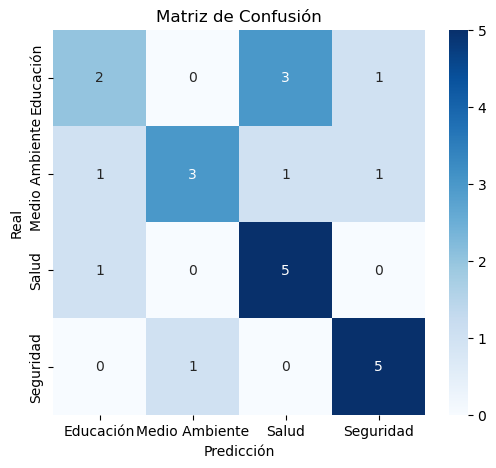

In [39]:
# =========================================
# ENTRENAMIENTO DE MODELO DE CLASIFICACIÓN DE TEXTO (ESPAÑOL)
# =========================================
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import nltk

# Descargar stopwords de NLTK si no las tienes
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_es = stopwords.words('spanish')

# --- 1. Limpieza básica del texto ---
def limpiar_texto(texto):
    texto = texto.lower()
    texto = re.sub(f"[{string.punctuation}]", "", texto)
    texto = re.sub(r"\d+", "", texto)
    texto = re.sub(r"\s+", " ", texto).strip()
    return texto

df_sintetico["Comentario_limpio"] = df_sintetico["Comentario"].apply(limpiar_texto)

# --- 2. División del dataset ---
X_train, X_test, y_train, y_test = train_test_split(
    df_sintetico["Comentario_limpio"],
    df_sintetico["Categoría del problema"],
    test_size=0.2,
    random_state=42,
    stratify=df_sintetico["Categoría del problema"]
)

# --- 3. Vectorización TF-IDF ---
vectorizador = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1, 2),
    stop_words=stopwords_es
)
X_train_tfidf = vectorizador.fit_transform(X_train)
X_test_tfidf = vectorizador.transform(X_test)

# --- 4. Entrenamiento del modelo ---
# modelo = LogisticRegression(max_iter=200)
modelo = LogisticRegression(C=2.0, solver='liblinear', class_weight='balanced', max_iter=300)

modelo.fit(X_train_tfidf, y_train)

# --- 5. Evaluación ---
y_pred = modelo.predict(X_test_tfidf)

print("REPORTE DE CLASIFICACIÓN:\n")
print(classification_report(y_test, y_pred))

# --- 6. Matriz de confusión visual ---
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()
